# README

MNIST 데이터 셋을 우편 번호 손글씨 인식이라는 가상 프로젝트의 데이터 셋으로 가정하여 SKP 상에서 간단한 Data Science 프로젝트를 진행해 봅니다. 

* notebooks-skp/mnist: https://github.com/comafire/notebooks-skp/tree/master/mnist

이 프로젝트를 통해서 볼 수 있는 내용은 아래와 같습니다.

* Airflow를 통한 Data Pipeline 수행 스켸쥴링
* Jupyter를 통한 Data Pipeline Task 개발
* Keras(Tensorflow backend)를 이용한 Deep Neural Network, Convolution Neural Network 모델링
* Scikit Learn을 이용한 ETL(Extract Load Transform), EDA(Exploratory Data Analysis), Baseline 모델링
* Flask를 이용한 Backend REST API 개발
* Nginx, VueJS, HTML, CSS를 이용한 Front Web UI 개발

이제 Data Science Methodology 에 의해 프로젝트를 진행해봅니다.

# Business Understanding

비지니스의 이해를 통해 풀어야 할 문제에 대한 정의와 프로젝트의 목표 및 결과를 설정.

## Business Problem

우편물 분류에 우편 번호를 현재는 사람을 통해서 분류하고 있어 시간과 비용이 많이 들고 있음.

자동 우편 분류를 위한 프로젝트를 진행 중이며, 해당 프로젝트에서 우편 번호 6자리의 위치 및 사진 촬영을 자동화하였음.

## Project Objective

촬영된 우편 번호 숫자 0~9를 판별.

## Project Outcome

* 숫자 판별을 위한 모델
  * Accuracy: 90% 이상
* 진행 중인 프로젝트와 연동을 위한 인터페이스
  * REST API를 제공

# Analytic Approach

통계, 머신러닝 기술을 이용하여 프로젝트 결과를 위한 접근방법 정의.

주저인 손 글씨 사진을 0~9 숫자로 판별하는 Classification 문제임.

주요 Classification Method

* XGboost, RandomForest, DNN, CNN

RandomForest 를 Baseline 모델로 사용하고 DNN 과 CNN 의 예측 결과를 제공하기로 함.

# Data Requirements

데이터 모델링에 사용될 알고리즘에 따라 필요한 데이터의 요구 사항정의.

손 글씨 분류를 위해 0~9 각 클래스에 대한 램덤 샘플링된 5천개 이상의 데이터가 필요할 것으로 예상됨.

# Data Collection

데이터 모델링에 사용될 데이터 Raw Data 수집 방법 정의.

자동 우편 분류 프로젝트에서 AWS 상에 램덤 샘플 데이터를 제공(이라고 가정하고, Keras 에서 제공하는 인터페이스를 사용).

매일 AWS 상에 제공된 데이터를 다운 받아 데이터 모델링에 사용.

* Data Pipeline Task: Collecting Raw Data
  * crd: https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/crd.ipynb

# Data Understanding

제공된 데이터에 대한 통계적, 시각적 방법을 통해 초기 데이터를 이해.

이를 토대로 다른 분석 프로세스의 방향과 추가 필요 사항들에 대한 영향을 줌.

기본 적인 데이터 이해를 위해 EDA를 간단하게 진행해 봅니다.

* Exploratory Data Analysis 
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/eda.ipynb
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/eda-tsne.ipynb

# Data Preparation

Data Collection 을 통해 수집된 Raw Data 를 각 모델에서 필요한 입력 데이터 형태에 맞게 변형.

EDA를 통해 얻은 데이터 정보와 Analytic Approach를 통해 생각한 모델링 방식에서 합의가 이루어 졌으면 각 모델에 필요한 데이터 입력을 만듭니다.

Baseline Model 용 ETL
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/etl-rf.ipynb
  
Data Pipeline Task: ETL(Extract Transform Load)
  * etl-dnn (Deep Neural Network 용): https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/etl-dnn.ipynb
  * etl-cnn (Convolutional Neural Network 용): https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/etl-cnn.ipynb

# Data Modeling

Data Preparation 을 통해 제공된 훈련용 입력 데이터를 이용해 데이터 모델 훈련.

Baseline Model용 Data Modeling
* https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/fdm-rf.ipynb

Data Pipeline Task: Fit Data Model
* fdm-dnn (Deep Neural Network 용): https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/fdm-dnn.ipynb
* fdm-cnn (Convolutional Neural Network 용): https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/fdm-cnn.ipynb

# Model Evaluation

Data Modeling 을 통해 훈련된 모델을 이용해 테스트 데이터에 대한 모델 성능을 평가.

Evaluate Data Model
* https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/edm-dnn.ipynb

# Build Data Product

최종 선택된 데이터 모델을 이용하여 Data Product 을 구축.

소스 디렉토리 구조

<pre>
.
├── README.ipynb
├── bin
│   ├── run_flask.sh
│   └── run_nginx.sh
├── doc
│   ├── data_science_methodology.ipynb
│   └── image
├── etc
│   └── nginx
│       └── nginx.conf
└── src
    ├── backend
    │   ├── crd.ipynb
    │   ├── eda-tsne.ipynb
    │   ├── eda.ipynb
    │   ├── edm-dnn.ipynb
    │   ├── edp.py
    │   ├── env.ipynb
    │   ├── etl-cnn.ipynb
    │   ├── etl-dnn.ipynb
    │   ├── etl-rf.ipynb
    │   ├── fdm-cnn.ipynb
    │   ├── fdm-dnn.ipynb
    │   ├── fdm-rf.ipynb
    │   ├── fdm_model.py
    │   ├── sdm.py
    │   ├── sdm_cnn.py
    │   ├── sdm_dnn.py
    │   ├── tests
    │   │   ├── 0.jpg
    │   │   ├── 1.jpg
    │   │   ├── 2.jpg
    │   │   ├── 4.jpg
    │   │   ├── 5.jpg
    │   │   ├── 7.jpg
    │   │   ├── 9.jpg
    │   │   └── test_index.py
    │   └── utils.py
    └── frontend
        ├── index.html
        └── js
            └── index.js
</pre>

Frontend
* Source: ./src/frontend

Backend
* Data Pipeline
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/edp.py
  * Execute: daily 
  * DAG Id: MNIST-edp
  * Task Id: crd -> etl-dnn -> fdm-dnn 
* REST API
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/sdm.py
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/sdm_dnn.py
  * https://github.com/comafire/notebooks-skp/blob/master/mnist/src/backend/sdm_cnn.py
* Run
```
./skp.sh docker_run_nginx --set NAME="nginx-skp-mnist",PORT="7180",VOLUME="/root/mnt/dfs/notebooks-skp/mnist"
./skp.sh docker_run_flask --set NAME="flask-skp-mnist",PORT="7190",VOLUME="/root/mnt/dfs/notebooks-skp/mnist"
```

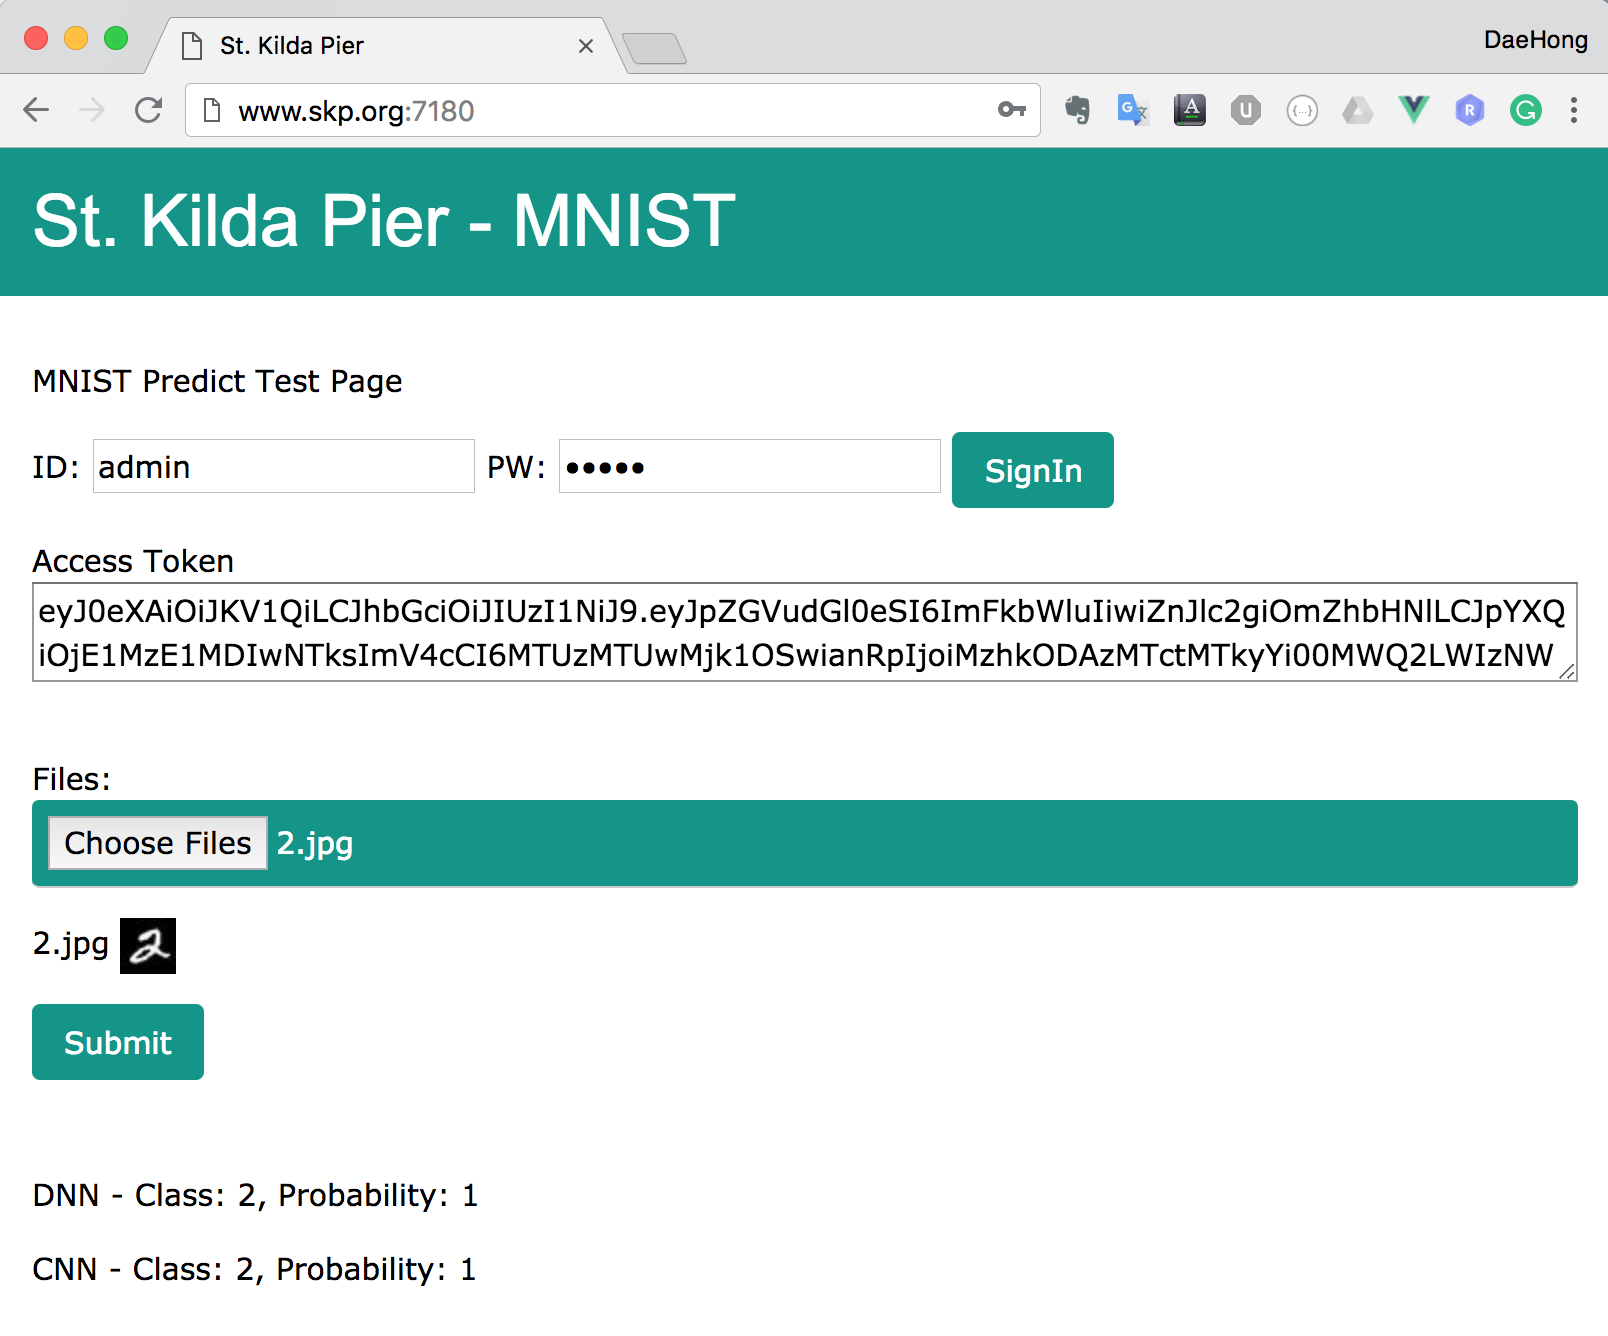

In [1]:
from IPython.display import Image

Image('../galleries/2018-skp-mnist-001.png', width=1024)

# Feedback

Data Product 사용자들의 Feedback 을 받아 전체 프로세스를 순환하면서 발전 시킴.